# Challenge Exercise: Airports case study Part 1

#### Data file

tsa_claims1.csv

#### Scenario

You are an analyst employed by the U.S. Transportation Security Administration (TSA). Your team lead has asked you to produce a report using a notebook that answers the following questions about insurance claims against airports in the U.S.

#### Questions
What is the most common type of insurance claim?<br>
Which claim site within the airport are claims most commonly filed for?<br>
What type of claim is made most at each claim site?<br>
What is the typical claim amount?<br>
What is the overall claim approval rate for the entire U.S.?<br>

#### Instructions
Create a Notebook for the study.<br>
Explore the data and clean the data according to techniques we have learned.<br>
a) use head and info to get more information.
b) use string replace to remove spaces in column names
c) remove columns that have 1 value that is the same
d) handle nulls
e) take care of object types that are actually numeric
f) change any object types to category as appropriate
g) change any object types to date time as appropriate

Using markdown, explain why you cleaned it the way you did.<br>
Create a heading for each question in ,markdown (see questions below). If necessary, perform additional cleaning or preparation for the question.<br>
Create a table or plot that answers the question and use markdown to explain the result.<br>
Repeat steps 3-5 for each question.<br>


In [138]:
import pandas as pd
import seaborn as sns

## Get the data

In [139]:
# NOTE: Setting the low_memory parameter to False fixes a warning.
tsaClaims = pd.read_csv('tsa_claims1.csv', low_memory=False)

## Examine the data

In [140]:
# use head() to examine the data
tsaClaims.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,1 4 2002,12 12 2002 12:00:00 AM,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,2 4 2002,11 26 2003 12:00:00 AM,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,2 7 2002,1 6 2003 12:00:00 AM,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513.00,2 18 2002,2 5 2005 12:00:00 AM,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636.00,2 18 2002,2 17 2005 12:00:00 AM,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


In [141]:
# use info() to learn more about the data
tsaClaims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94845 entries, 0 to 94844
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Claim Number   94845 non-null  object 
 1   Date Received  94845 non-null  object 
 2   Incident Date  94845 non-null  object 
 3   Airport Code   94845 non-null  object 
 4   Airport Name   94845 non-null  object 
 5   Airline Name   94845 non-null  object 
 6   Claim Type     94845 non-null  object 
 7   Claim Site     94845 non-null  object 
 8   Item           94845 non-null  object 
 9   Claim Amount   94845 non-null  float64
 10  Status         94845 non-null  object 
 11  Close Amount   94845 non-null  float64
 12  Disposition    94845 non-null  object 
dtypes: float64(2), object(11)
memory usage: 9.4+ MB


In [142]:
# use describe to get statistical information on the numerical fields
tsaClaims.describe().T

,count,mean,std,min,25%,50%,75%,max
Claim Amount,94845.0,3634.940272,524951.962954,0.0,65.0,183.69,480.68,125000000.0
Close Amount,94845.0,89.044851,882.072577,0.0,0.0,0.00,61.96,250000.0


In [143]:
# use nunique() to learn about the number unique
tsaClaims.nunique()

Claim Number     94845
Date Received     2014
Incident Date     3882
Airport Code       411
Airport Name       412
Airline Name       186
Claim Type           6
Claim Site           4
Item              3072
Claim Amount     27013
Status               5
Close Amount     13570
Disposition          3
dtype: int64

## Clean the data

In [144]:
# To make it easier to work with columns, remove spaces from column names.
tsaClaims.columns = tsaClaims.columns.str.replace(' ', '')

In [145]:
# check your work with head()
tsaClaims.head()

,ClaimNumber,DateReceived,IncidentDate,AirportCode,AirportName,AirlineName,ClaimType,ClaimSite,Item,ClaimAmount,Status,CloseAmount,Disposition
0,0909802M,1 4 2002,12 12 2002 12:00:00 AM,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,2 4 2002,11 26 2003 12:00:00 AM,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,2 7 2002,1 6 2003 12:00:00 AM,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513.00,2 18 2002,2 5 2005 12:00:00 AM,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636.00,2 18 2002,2 17 2005 12:00:00 AM,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


In [146]:
# handle any nulls
tsaClaims.isnull().sum()
tsaClaims.fillna(0)

,ClaimNumber,DateReceived,IncidentDate,AirportCode,AirportName,AirlineName,ClaimType,ClaimSite,Item,ClaimAmount,Status,CloseAmount,Disposition
0,0909802M,1 4 2002,12 12 2002 12:00:00 AM,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,2 4 2002,11 26 2003 12:00:00 AM,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,2 7 2002,1 6 2003 12:00:00 AM,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513.00,2 18 2002,2 5 2005 12:00:00 AM,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636.00,2 18 2002,2 17 2005 12:00:00 AM,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94840,2010010567195.00,12 31 2009,12 14 2009 12:00:00 AM,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),175.90,Denied,0.00,Deny
94841,2010010667196.00,12 31 2009,12 17 2009 7:55:00 AM,BWI,Baltimore Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphon...,695.00,Denied,0.00,Deny
94842,2010010667198.00,12 31 2009,12 15 2009 12:00:00 AM,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,25.50,Denied,0.00,Deny
94843,2010010667199.00,12 31 2009,12 16 2009 10:00:00 AM,ENV,Wendover Municipal Airport,Xtra Airways,Passenger Property Loss,Checked Baggage,Locks,20.00,Denied,0.00,Deny


In [147]:
# remove columns with one value
tsaClaims_number_of_unique_values = tsaClaims.nunique()
tsaClaims_columns_to_drop = tsaClaims_number_of_unique_values[tsaClaims_number_of_unique_values == 1].index
tsaClaims_removed_one_value = tsaClaims.drop(tsaClaims_columns_to_drop, axis = 1)
tsaClaims_removed_one_value.head()

,ClaimNumber,DateReceived,IncidentDate,AirportCode,AirportName,AirlineName,ClaimType,ClaimSite,Item,ClaimAmount,Status,CloseAmount,Disposition
0,0909802M,1 4 2002,12 12 2002 12:00:00 AM,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,2 4 2002,11 26 2003 12:00:00 AM,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,2 7 2002,1 6 2003 12:00:00 AM,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513.00,2 18 2002,2 5 2005 12:00:00 AM,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636.00,2 18 2002,2 17 2005 12:00:00 AM,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


In [164]:
# apply data types to columns as appropriate (date time, category)
tsaClaims['DateReceived'] = pd.to_datetime(tsaClaims['DateReceived'])
tsaClaims = tsaClaims.astype({"ClaimType":'category', "ClaimSite":'category', "Item":'category', "Status":'category', "Disposition":'category'})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94845 entries, 0 to 94844
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClaimNumber   94845 non-null  object        
 1   DateReceived  94845 non-null  datetime64[ns]
 2   IncidentDate  94845 non-null  object        
 3   AirportCode   94845 non-null  object        
 4   AirportName   94845 non-null  object        
 5   AirlineName   94845 non-null  object        
 6   ClaimType     94845 non-null  category      
 7   ClaimSite     94845 non-null  category      
 8   Item          94845 non-null  category      
 9   ClaimAmount   94845 non-null  float64       
 10  Status        94845 non-null  category      
 11  CloseAmount   94845 non-null  float64       
 12  Disposition   94845 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(2), object(5)
memory usage: 6.4+ MB


## Analyze the data

### What is the most common type of claim?

In [148]:
# Group by ClaimType and count the number of claims for each type
claimType = tsaClaims.groupby('ClaimType').size()


# Reset the index so the ClaimType column can be used by Seaborn
# (this code is given to you)
claimType.reset_index()

claimType.head(10)

ClaimType
Employee Loss (MPCECA)       308
Motor Vehicle                  6
Passenger Property Loss    60264
Passenger Theft              331
Personal Injury              208
Property Damage            33728
dtype: int64

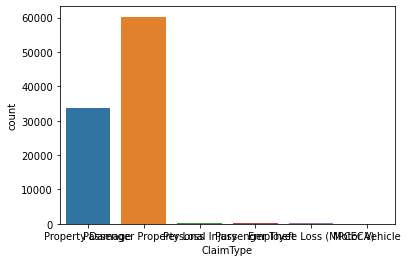

In [130]:
# Plot all claim types that have more than 400 rows...this removes the less common claim types|
ClaimType_count_plot = sns.countplot(x='ClaimType', data = tsaClaims)

#### What claim type if the most common?
Passenger Property Loss

### Which claim site is the most common?

In [149]:
# Group by ClaimType and count the number of claims for each type.
groupby_claimType_Count = tsaClaims.groupby('ClaimType').size()
groupby_claimType_Count.reset_index()
groupby_claimType_Count.head(10)

ClaimType
Employee Loss (MPCECA)       308
Motor Vehicle                  6
Passenger Property Loss    60264
Passenger Theft              331
Personal Injury              208
Property Damage            33728
dtype: int64

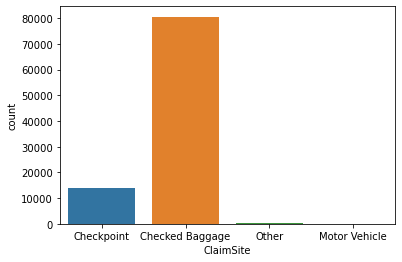

In [150]:
# create an appropriate plot showing claim count on x asix and 
# claim site on y
ClaimSite_count_plot = sns.countplot(x='ClaimSite', data = tsaClaims)

#### Which claim site is the most common?
Checked Baggage

In [151]:
groupby_claimType_Count = tsaClaims.groupby('ClaimSite').size()
groupby_claimType_Count.reset_index()
groupby_claimType_Count.head()

ClaimSite
Checked Baggage    80551
Checkpoint         14012
Motor Vehicle          2
Other                280
dtype: int64

### Which type of claim is typically made at each claim site?

In [152]:
# create a chart that groups claimtype and claim site with a count of claim number (reset_index)
ClaimSite_ClaimType_group = tsaClaims.groupby(['ClaimType','ClaimSite']).size()
ClaimSite_ClaimType_group.reset_index()
ClaimSite_ClaimType_group


ClaimType                ClaimSite      
Employee Loss (MPCECA)   Checked Baggage      275
                         Checkpoint            32
                         Other                  1
Motor Vehicle            Checked Baggage        4
                         Checkpoint             1
                         Other                  1
Passenger Property Loss  Checked Baggage    53363
                         Checkpoint          6740
                         Motor Vehicle          2
                         Other                159
Passenger Theft          Checked Baggage      294
                         Checkpoint            36
                         Other                  1
Personal Injury          Checked Baggage       89
                         Checkpoint           112
                         Other                  7
Property Damage          Checked Baggage    26526
                         Checkpoint          7091
                         Other                111
dtype: in

In [153]:
# show the results with count > 300
ClaimSite_ClaimType_group_over300 = ClaimSite_ClaimType_group > 300
ClaimSite_ClaimType_group_over300

ClaimType                ClaimSite      
Employee Loss (MPCECA)   Checked Baggage    False
                         Checkpoint         False
                         Other              False
Motor Vehicle            Checked Baggage    False
                         Checkpoint         False
                         Other              False
Passenger Property Loss  Checked Baggage     True
                         Checkpoint          True
                         Motor Vehicle      False
                         Other              False
Passenger Theft          Checked Baggage    False
                         Checkpoint         False
                         Other              False
Personal Injury          Checked Baggage    False
                         Checkpoint         False
                         Other              False
Property Damage          Checked Baggage     True
                         Checkpoint          True
                         Other              False
dtype: bo

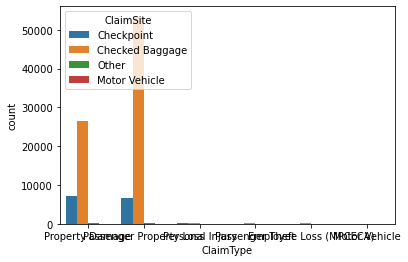

In [154]:
# use sns.datplot to create a plot
ClaimSite_ClaimType_group_plot = sns.countplot(x='ClaimType', hue='ClaimSite', data=tsaClaims)


#### Compare checked baggage and checkpoint site - what types of claims aare made at these two sites?

In the count where we found values over 300, for checked baggage and checkpoint site, we got Passenger Property Loss and Property Damage as the claims for these sites. 

### What is the typical claim amount?

In [155]:
# use describe to look at the claim amount
tsaClaims.describe().T

,count,mean,std,min,25%,50%,75%,max
ClaimAmount,94845.0,3634.940272,524951.962954,0.0,65.0,183.69,480.68,125000000.0
CloseAmount,94845.0,89.044851,882.072577,0.0,0.0,0.00,61.96,250000.0


In [156]:
# group claims by status and show claimnumber counts
groupby_ClaimStatus = tsaClaims.groupby('Status').size()

groupby_ClaimStatus.head(10)

Status
Approved                          23165
Canceled                              6
Denied                            53272
Pending response from claimant        1
Settled                           18401
dtype: int64

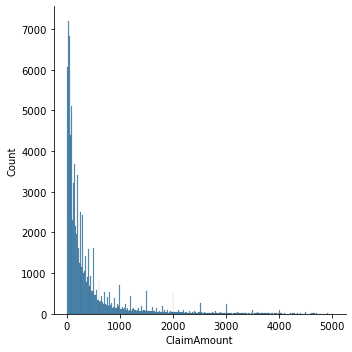

In [80]:
# Use a distribution plot for all claims that are less than 5,000
sns.displot(tsaClaims.ClaimAmount[tsaClaims.ClaimAmount < 5000])


#### The typical claim is less than $250.

### What percent of claims are approved?

In [82]:
# group by status and show count of claim number
groupby_ClaimStatus = tsaClaims.groupby('Status').size()
groupby_ClaimStatus.head()


Status
Approved                          23165
Canceled                              6
Denied                            53272
Pending response from claimant        1
Settled                           18401
dtype: int64

In [105]:
# calculate approval rate
approval_amount = tsaClaims.loc[(tsaClaims['Status'] == "Approved")].count()
approval_amount
total_claims = tsaClaims['Status'].count()
approval_rate = (approval_amount/total_claims) *100
approval_rate['Status']


24.42406030892509

#### What is the rate of approval?

In [100]:
# 24.42%